In [1]:
import numpy as np
import functools as ft

# Basis states

In [6]:
pauli_Z = np.array([1, 0, 0, -1]).reshape([2, 2])
pauli_X = np.array([0, 1, 1, 0]).reshape([2, 2])
pauli_Y = np.array([0, -1j, 1j, 0]).reshape([2, 2])

_eigenvalues, _eigenvectors = np.linalg.eig(pauli_Z)
H = _eigenvectors[0]
V = _eigenvectors[1]

_eigenvalues, _eigenvectors = np.linalg.eig(pauli_X)
D = _eigenvectors[0]
A = _eigenvectors[1]

_eigenvalues, _eigenvectors = np.linalg.eig(pauli_Y)
R = _eigenvectors[0]
L = _eigenvectors[1]

In [53]:
def densitymatrix(state):
    return np.outer(state, np.conjugate(state))

In [54]:
densitymatrix(Bell["Psi Minus"])

array([[ 0. ,  0. , -0. ,  0. ],
       [ 0. ,  0.5, -0.5,  0. ],
       [-0. , -0.5,  0.5, -0. ],
       [ 0. ,  0. , -0. ,  0. ]])

In [38]:
Bell["Psi Minus"]

array([ 0.        ,  0.70710678, -0.70710678,  0.        ])

Below is an example of how to call a function that acts iteratively on the arguments, similar to how mapping works in mathematica.

In [7]:
args = [np.arange(2), np.arange(2,4)]
np.kron(*args)

array([0, 0, 2, 3])

Could write something clever for calling the Kron of basis vectors. Need to make the basis vectors a dictionary, in order to call something from a string. Think thats the cleanest way to go, rather than bulk editting HH, HV, VH, VV, DD, DA etc...

In [72]:
Bell = {
    "Psi Minus": (1/np.sqrt(2))*(np.kron(H,V) - np.kron(V,H)),
    "Psi Plus": (1/np.sqrt(2))*(np.kron(H,V) + np.kron(V,H)),
    "Phi Plus": (1/np.sqrt(2))*(np.kron(H,H) + np.kron(V,V)),
    "Phi Minus": (1/np.sqrt(2))*(np.kron(H,H) - np.kron(V,V))
}

In [9]:
Bell["Psi Minus"]

array([ 0.        ,  0.70710678, -0.70710678,  0.        ])

In [10]:
np.kron(H,H)

array([1., 0., 0., 0.])

In [11]:
_args = [H, H]
np.kron(*_args)

array([1., 0., 0., 0.])

Writing a function which can perform the Kronecker delta on more than two arguments, run through a quick example first.

In [12]:
_args = [H, H, H, H]

ft.reduce(lambda x, y: np.kron(x, y), _args)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The ft.reduce function is roughly equivalent to the following lines of code. Additionally, I define kronk, which will take the Kronecker product of a list of inputs

In [13]:
def reduce(function, iterable, initializer = None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

def kronk(iterable):
    return reduce(np.kron, iterable)

In [14]:
reduce(np.kron, _args)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
kronk([H,V,H])

array([0., 0., 1., 0., 0., 0., 0., 0.])

The below generates a GHZ state of arbitrary dimensions by calling GHZ(n) where n is the dimension of the state

In [16]:
def GHZ(dimension):

    _basis_vector_H = []
    _basis_vector_V = []
    _basis_vectors = [H, V]
    
    for i in range(dimension):
        _basis_vector_H.append(_basis_vectors[0])
        _basis_vector_V.append(_basis_vectors[1])

    
    return 1/np.sqrt(2)*(reduce(np.kron, _basis_vector_H) + reduce(np.kron, _basis_vector_V))


In [17]:
GHZ(4)

array([0.70710678, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70710678])

# Noise

In [18]:
def depol_noise(_rho, p):
    # only works for single qubit sub-space 
    # to scale, there needs to be an option to which qubit the noise is being applied to
    # once this option has been declared, there needs to be appropriate kronecker products made between identity and pauli operator 
    _rho_prime = (1 - p)*_rho + (p/3)*(pauli_X*_rho*pauli_X + pauli_Y*_rho*pauli_Y + pauli_Z*_rho*pauli_Z)
    return _rho_prime

In [59]:
rho = densitymatrix(H)

In [60]:
depol_noise(rho, 0.5)

array([[0.66666667+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j]])

## Plotting density matrices

NameError: name 'ax' is not defined

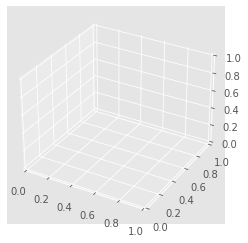

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)

In [76]:
densitymatrix(Bell["Psi Minus"])

array([[ 0. ,  0. , -0. ,  0. ],
       [ 0. ,  0.5, -0.5,  0. ],
       [-0. , -0.5,  0.5, -0. ],
       [ 0. ,  0. , -0. ,  0. ]])

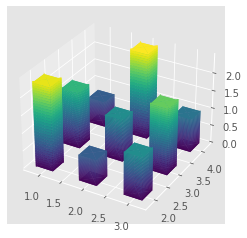

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection= Axes3D.name)

def make_bar(ax, x0=0, y0=0, width = 0.5, height=1 , cmap="viridis",  
              norm=matplotlib.colors.Normalize(vmin=0, vmax=1), **kwargs ):
    # Make data
    u = np.linspace(0, 2*np.pi, 4+1)+np.pi/4.
    v_ = np.linspace(np.pi/4., 3./4*np.pi, 100)
    v = np.linspace(0, np.pi, len(v_)+2 )
    v[0] = 0 ;  v[-1] = np.pi; v[1:-1] = v_
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    xthr = np.sin(np.pi/4.)**2 ;  zthr = np.sin(np.pi/4.)
    x[x > xthr] = xthr; x[x < -xthr] = -xthr
    y[y > xthr] = xthr; y[y < -xthr] = -xthr
    z[z > zthr] = zthr  ; z[z < -zthr] = -zthr

    x *= 1./xthr*width; y *= 1./xthr*width
    z += zthr
    z *= height/(2.*zthr)
    #translate
    x += x0; y += y0
    #plot
    ax.plot_surface(x, y, z, cmap=cmap, norm=norm, **kwargs)

def make_bars(ax, x, y, height, width=1):
    widths = np.array(width)*np.ones_like(x)
    x = np.array(x).flatten()
    y = np.array(y).flatten()

    h = np.array(height).flatten()
    w = np.array(widths).flatten()
    norm = matplotlib.colors.Normalize(vmin=0, vmax=h.max())
    for i in range(len(x.flatten())):
        make_bar(ax, x0=x[i], y0=y[i], width = w[i] , height=h[i], norm=norm)


X, Y = np.meshgrid([1,2,3], [2,3,4])
Z = np.sin(X*Y)+1.5

make_bars(ax, X,Y,Z, width=0.2, )
plt.show()